<a href="https://colab.research.google.com/github/sss4920/machinelearning_study/blob/main/21_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)


In [ ]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop =keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
160/160 [==============================] - 6s 23ms/step - loss: 0.6930 - accuracy: 0.5116 - val_loss: 0.6931 - val_accuracy: 0.4910
Epoch 2/100
160/160 [==============================] - 3s 19ms/step - loss: 0.6926 - accuracy: 0.5189 - val_loss: 0.6928 - val_accuracy: 0.4930
Epoch 3/100
160/160 [==============================] - 4s 25ms/step - loss: 0.6921 - accuracy: 0.5134 - val_loss: 0.6925 - val_accuracy: 0.4977
Epoch 4/100
160/160 [==============================] - 4s 28ms/step - loss: 0.6916 - accuracy: 0.5206 - val_loss: 0.6920 - val_accuracy: 0.5055
Epoch 5/100
160/160 [==============================] - 4s 28ms/step - loss: 0.6908 - accuracy: 0.5366 - val_loss: 0.6912 - val_accuracy: 0.5191
Epoch 6/100
160/160 [==============================] - 5s 29ms/step - loss: 0.6898 - accuracy: 0.5459 - val_loss: 0.6901 - val_accuracy: 0.5426
Epoch 7/100
160/160 [==============================] - 4s 24ms/step - loss: 0.6882 - accuracy: 0.5736 - val_loss: 0.6884 - val_accuracy:

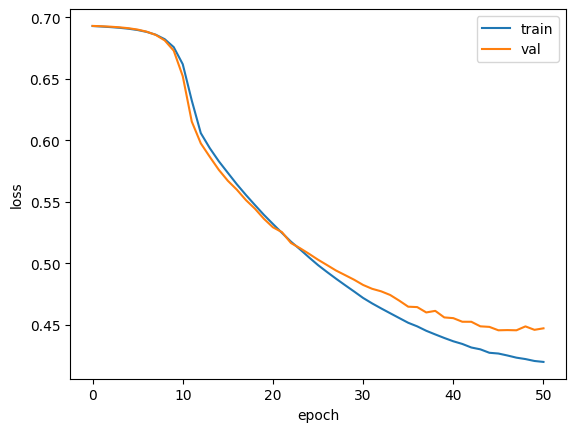

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Epoch 1/100
160/160 [==============================] - 5s 23ms/step - loss: 0.6924 - accuracy: 0.5281 - val_loss: 0.6918 - val_accuracy: 0.5598
Epoch 2/100
160/160 [==============================] - 4s 22ms/step - loss: 0.6912 - accuracy: 0.5556 - val_loss: 0.6908 - val_accuracy: 0.5609
Epoch 3/100
160/160 [==============================] - 4s 25ms/step - loss: 0.6894 - accuracy: 0.5731 - val_loss: 0.6890 - val_accuracy: 0.5777
Epoch 4/100
160/160 [==============================] - 3s 20ms/step - loss: 0.6871 - accuracy: 0.5954 - val_loss: 0.6860 - val_accuracy: 0.6090
Epoch 5/100
160/160 [==============================] - 4s 27ms/step - loss: 0.6825 - accuracy: 0.6287 - val_loss: 0.6796 - val_accuracy: 0.6539
Epoch 6/100
160/160 [==============================] - 6s 40ms/step - loss: 0.6720 - accuracy: 0.6662 - val_loss: 0.6603 - val_accuracy: 0.7012
Epoch 7/100
160/160 [==============================] - 3s 20ms/step - loss: 0.6406 - accuracy: 0.6969 - val_loss: 0.6171 - val_accuracy:

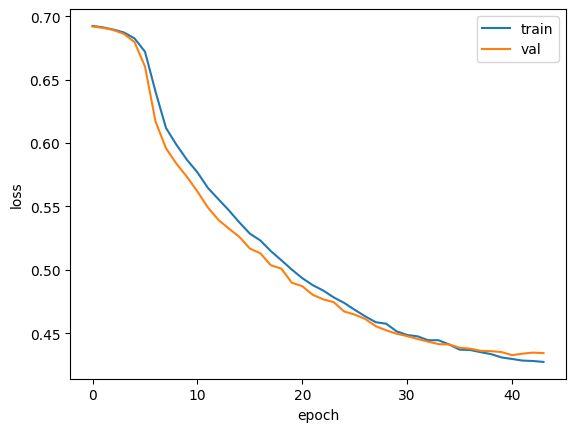

In [ ]:
model2 = keras.Sequential()


model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop =keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_6 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_7 (LSTM)               (None, 8)                 544       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
160/160 [==============================] - 11s 54ms/step - loss: 0.6929 - accuracy: 0.5098 - val_loss: 0.6930 - val_accuracy: 0.4949
Epoch 2/100
160/160 [==================

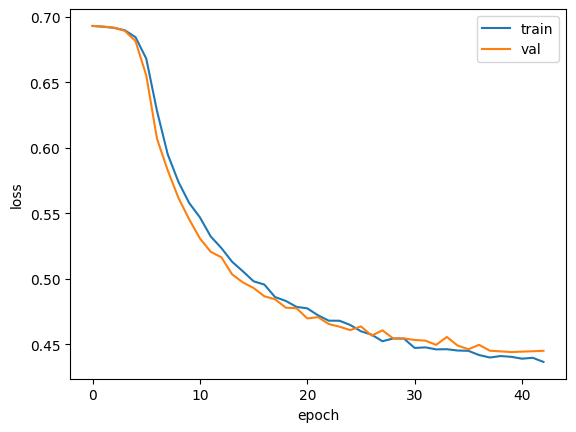

In [ ]:
model3 = keras.Sequential()


model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

rmsprop =keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()



In [ ]:
model4 = keras.Sequential()


model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()





Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru_1 (GRU)                 (None, 8)                 624       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
160/160 [==============================] - 6s 27ms/step - loss: 0.6925 - accuracy: 0.5215 - val_loss: 0.6927 - val_accuracy: 0.5094
Epoch 2/100
160/160 [==============================] - 3s 19ms/step - loss: 0.6914 - accuracy: 0.5410 - val_loss: 0.6921 - val_accuracy: 0.5164
Epoch 3/100
160/160 [==============================] - 3s 19ms/step - loss: 0.6903 - accuracy: 0.5370 - val_loss: 0.6910 - val_accuracy: 0.5211
Epoch 4/100
160/160 [==============================] - 3s 20ms/step - loss: 0.6888 - accuracy: 0.5437 - val_loss: 0.6897 - val_accuracy: 0.5348
Epoch 5/100
160/160 [==============================] - 4s 23ms/step - loss: 0.6870 - accuracy: 0.5570 - val_loss: 0.6880 - val_accuracy: 0.5418
Epoch 6/100
160/160 [==============================] - 3s 20ms/step - loss: 0.6847 - accuracy: 0.5832 - val_loss: 0.6859 - val_accuracy: 0.5555
Epoch 7/100
160/160 [==============================] - 3s 19ms/step - loss: 0.6818 - accuracy: 0.5821 - val_loss: 0.6827 - val_accuracy:

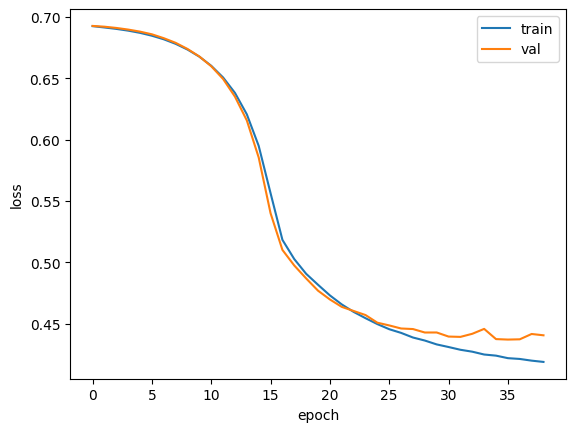

In [ ]:
rmsprop =keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_6 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_7 (LSTM)               (None, 8)                 544       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored